In [2]:
import pickle
import typing
import json
import sys
import os
from copy import deepcopy
from functools import partial

import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [7]:
low = np.asarray([-1.25, -0.06])
high = np.asarray([0.5, 0.06])
norm = lambda x: (x - low) / (high - low)
unnorm = lambda x: x * (high - low) + low

delta = 0.075
radius = unnorm(np.asarray([delta, delta])) - unnorm(np.asarray([0, 0]))
distance = lambda s, g: np.linalg.norm(s - g)
radius

array([0.13125, 0.009  ])

In [46]:
[f for f in os.listdir(r'out/hierarchical/mc_out_no_testing/') if 'out' in f]
[f for f in os.listdir(r'out/hierarchical/mc_out_corrected_testing/') if 'out' in f]

['MC_HMuZero_20210315-160455.out',
 'MC_HMuZero_20210315-180212.out',
 'MC_HMuZero_20210315-194318.out']

In [43]:
with open(r'out/hierarchical/mc_out/MC_HMuZero_20210311-161502.out', 'rb') as f:
    out = list(pickle.load(f)[0].values())[0]

In [44]:
idx = 2
obs = np.asarray(out[idx].observations).reshape(-1, 2)
goals = np.asarray([x.goal for x in out[idx].goals]).reshape(-1, 2)

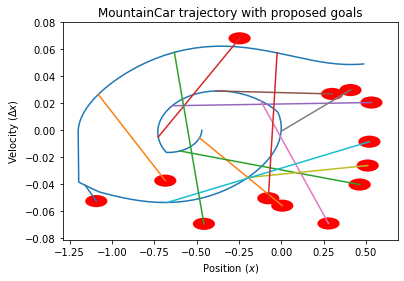

In [45]:
idx = 1
obs = np.asarray(out[idx].observations).reshape(-1, 2)
goals = np.asarray([x.goal for x in out[idx].goals]).reshape(-1, 2)

plt.plot(obs[:, 0], obs[:, 1])

coords = [([obs[x,0], goals[x, 0]], [obs[x,1], goals[x, 1]]) for x in range(len(goals)) 
          if (x + 1 < len(goals)) and np.all(goals[x] != goals[x + 1])]

[plt.plot(*c) for c in coords[::2]]
ells = [plt.gca().add_patch(Ellipse(np.asarray(c)[:,1], height=radius[1], width=radius[0], facecolor='red')) for c in coords[::2]]




plt.title("MountainCar trajectory with proposed goals")
plt.xlabel(r"Position ($x$)")
plt.ylabel(r"Velocity ($\Delta x$)")

plt.show()

In [17]:
with open(r'out/hierarchical/mc_out_corrected_testing/MC_HMuZero_20210315-160455.out', 'rb') as f:
    out = list(pickle.load(f)[0].values())[0]

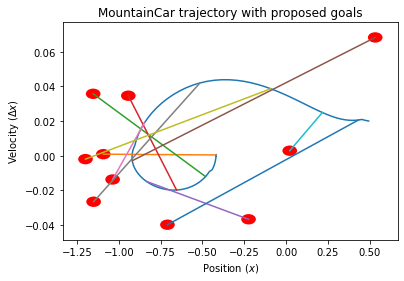

In [29]:
idx = -2
obs = np.asarray(out[idx].observations).reshape(-1, 2)
goals = np.asarray([x.goal for x in out[idx].goals]).reshape(-1, 2)

plt.plot(obs[:, 0], obs[:, 1])

coords = [([obs[x,0], goals[x, 0]], [obs[x,1], goals[x, 1]]) for x in range(len(goals)) 
          if (x + 1 < len(goals)) and np.all(goals[x] != goals[x + 1])]

[plt.plot(*c) for c in coords[::2]]
ells = [plt.gca().add_patch(Ellipse(np.asarray(c)[:,1], height=radius[1], width=radius[0], facecolor='red')) for c in coords[::2]]




plt.title("MountainCar trajectory with proposed goals")
plt.xlabel(r"Position ($x$)")
plt.ylabel(r"Velocity ($\Delta x$)")

plt.show()

In [33]:
with open(r'out/hierarchical/mc_out_corrected_testing/MC_HMuZero_20210315-180212.out', 'rb') as f:
    out = list(pickle.load(f)[0].values())[0]

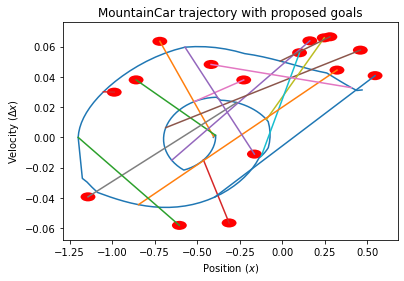

In [35]:
idx = 1
obs = np.asarray(out[idx].observations).reshape(-1, 2)
goals = np.asarray([x.goal for x in out[idx].goals]).reshape(-1, 2)

plt.plot(obs[:, 0], obs[:, 1])

coords = [([obs[x,0], goals[x, 0]], [obs[x,1], goals[x, 1]]) for x in range(len(goals)) 
          if (x + 1 < len(goals)) and np.all(goals[x] != goals[x + 1])]

[plt.plot(*c) for c in coords[::2]]
ells = [plt.gca().add_patch(Ellipse(np.asarray(c)[:,1], height=radius[1], width=radius[0], facecolor='red')) for c in coords[::2]]




plt.title("MountainCar trajectory with proposed goals")
plt.xlabel(r"Position ($x$)")
plt.ylabel(r"Velocity ($\Delta x$)")

plt.show()

In [47]:
with open(r'out/hierarchical/mc_out_corrected_testing/MC_HMuZero_20210315-194318.out', 'rb') as f:
    out = list(pickle.load(f)[0].values())[0]

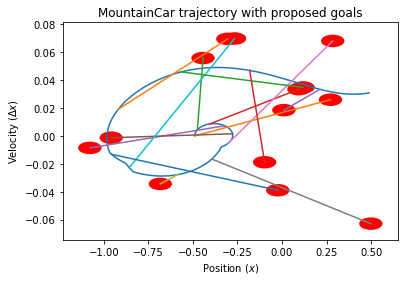

In [50]:
idx = 2
obs = np.asarray(out[idx].observations).reshape(-1, 2)
goals = np.asarray([x.goal for x in out[idx].goals]).reshape(-1, 2)

plt.plot(obs[:, 0], obs[:, 1])

coords = [([obs[x,0], goals[x, 0]], [obs[x,1], goals[x, 1]]) for x in range(len(goals)) 
          if (x + 1 < len(goals)) and np.all(goals[x] != goals[x + 1])]

[plt.plot(*c) for c in coords[::2]]
ells = [plt.gca().add_patch(Ellipse(np.asarray(c)[:,1], height=radius[1], width=radius[0], facecolor='red')) for c in coords[::2]]




plt.title("MountainCar trajectory with proposed goals")
plt.xlabel(r"Position ($x$)")
plt.ylabel(r"Velocity ($\Delta x$)")

plt.show()

In [9]:
x = (np.array([[[-0.56310745,  0.00900056]]]), np.array([[[-0.53461127,  0.00967754]]]), 1, -1, np.array([[[-0.55381127,  0.00929618]]]), np.array([[[-0.53461127,  0.00967754]]]), 0)
x

(array([[[-0.56310745,  0.00900056]]]),
 array([[[-0.53461127,  0.00967754]]]),
 1,
 -1,
 array([[[-0.55381127,  0.00929618]]]),
 array([[[-0.53461127,  0.00967754]]]),
 0)

In [14]:
np.linalg.norm(norm(x[1]) - norm(x[4])) <= 0.05

True

array([[[0.39782213, 0.57746817]]])